In [1]:
import sys
import numpy as np
import math 
from imutils import face_utils
from collections import OrderedDict
import cv2
import argparse
import imutils
import dlib


sys.path.append('..')
from opencv_course import ImageUtil

In [2]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


In [3]:
def distance_p2line(p, l1, l2):
    return np.linalg.norm(np.cross(l2-l1, l1-p))/np.linalg.norm(l2-l1)

In [4]:
def distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    return math.sqrt(math.pow(x2 - x1, 2) + math.pow(y2 - y1, 2) * 1.0) 

In [5]:
def eye_ratio(left, right, p1, p2, p3, p4):
    d1 = distance_p2line(p1, left, right)
    d2 = distance_p2line(p2, left, right)
    d3 = distance_p2line(p3, left, right)
    d4 = distance_p2line(p4, left, right)
    avg_d = sum([d1, d2, d3, d4]) / 4
    return avg_d / distance(left, right)

In [6]:
# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])


In [11]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
shape_predictor = '../../detector/shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

In [15]:
# load the input image, resize it, and convert it to grayscale
image = cv2.imread('two.png')
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

In [18]:
# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
#     cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # show the face number
#     cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
#         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    i=1
    for (x, y) in shape:
        if i>=37 and i<=48:
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)
        i+=1
        
    left_ratio = eye_ratio(shape[36], shape[39], shape[37], shape[38], shape[40], shape[41])
    x1, y1 = shape[39]
    if left_ratio < 0.13:
        cv2.putText(image, "Closed".format(round(left_ratio, 2)), (x1 - 30, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
    else:
        cv2.putText(image, "Open".format(round(left_ratio, 2)), (x1 - 30, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
    print("Left ratio:{}".format(left_ratio))
        
    right_ratio = eye_ratio(shape[42], shape[45], shape[43], shape[44], shape[46], shape[47])
    x2, y2 = shape[45]
    if right_ratio < 0.13:
        cv2.putText(image, "Closed".format(round(right_ratio, 2)), (x2, y2 - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)
    else:
        cv2.putText(image, "Open".format(round(right_ratio, 2)), (x2, y2 - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 255, 0), 1)
    print("Right ratio:{}".format(right_ratio))

Left ratio:0.16501650165016504
Right ratio:0.1710344827586207
Left ratio:0.17299270072992703
Right ratio:0.13459983831851252


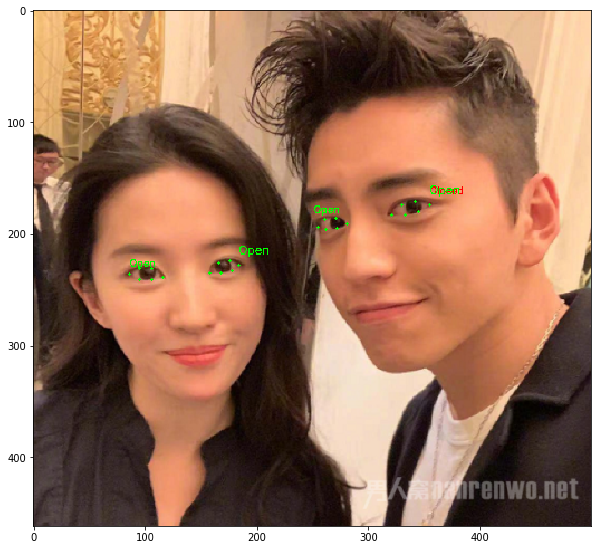

In [19]:
ImageUtil.imshow([image])